# Comparing Softmax,Perception and random algorithms performance


# EDA

### Import necessary libraries

In [15]:
### Below we read in the data to be used for the assessment

##We will be using a subset of the input features. These have been extracted below. Prior to training your models, remember to think about any data pre-processing that might be necessary

 # load libraries
import warnings
warnings.filterwarnings("ignore")
    
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import Perceptron
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
import seaborn as sns

### Loading datasets into DataFrame

In [2]:
#Loading Dataset 1
df1 = pd.read_csv('FlowData.csv')
df1.head()

,Unnamed: 0,FSC-A,FSC-H,FSC-W,SSC-A,SSC-H,SSC-W,CD56,HLA DR,CD11c,...,CD45,CD11b,CD3,CD62L,CD123,LD,CD10,CD24,CD1c,CD19
0,Neutrophils,0.5367,0.6668,0.2162,1.3399,1.4479,-0.0414,-0.2123,-0.0037,1.4900,...,0.2940,0.7989,-1.7232,1.0440,1.4013,-0.3542,1.6915,-0.1015,-0.8717,0.4611
1,T cells,0.3968,0.5969,-0.0706,-0.5514,-0.4990,-0.3400,-0.3367,0.2484,-1.4794,...,1.0867,-1.0992,1.4287,0.9965,-0.6552,-0.8258,-0.7974,-0.8294,-0.4260,-0.9799
2,T cells,0.4027,0.5076,0.1332,-0.4898,-0.4601,-0.2297,-0.6202,-0.8617,-2.0842,...,0.9950,0.1804,1.9320,0.9550,-0.7160,-0.1475,-0.8244,0.4826,-0.1738,-1.2585
3,Neutrophils,0.4815,0.5283,0.3335,1.3820,1.4708,0.0491,-0.0069,0.0947,1.5479,...,0.4747,0.9476,-0.6939,0.9450,0.7360,-0.2346,1.7379,-0.4983,-3.3287,-0.2756
4,T cells,0.8756,0.9887,0.5940,0.4942,0.5065,0.1161,-0.3811,2.7928,-0.3060,...,1.1589,0.8879,1.6729,1.1224,1.1447,-1.2597,-0.1017,0.7252,0.7702,1.5818


In [3]:
#Renaming the First column
df1.rename(columns={"Unnamed: 0": "Classes"}, inplace=True)
df1.columns

Index(['Classes', 'FSC-A', 'FSC-H', 'FSC-W', 'SSC-A', 'SSC-H', 'SSC-W', 'CD56',
       'HLA DR', 'CD11c', 'CD14', 'CD16', 'CD45', 'CD11b', 'CD3', 'CD62L',
       'CD123', 'LD', 'CD10', 'CD24', 'CD1c', 'CD19'],
      dtype='object')

In [4]:
df1

,Classes,FSC-A,FSC-H,FSC-W,SSC-A,SSC-H,SSC-W,CD56,HLA DR,CD11c,...,CD45,CD11b,CD3,CD62L,CD123,LD,CD10,CD24,CD1c,CD19
0,Neutrophils,0.5367,0.6668,0.2162,1.3399,1.4479,-0.0414,-0.2123,-0.0037,1.4900,...,0.2940,0.7989,-1.7232,1.0440,1.4013,-0.3542,1.6915,-0.1015,-0.8717,0.4611
1,T cells,0.3968,0.5969,-0.0706,-0.5514,-0.4990,-0.3400,-0.3367,0.2484,-1.4794,...,1.0867,-1.0992,1.4287,0.9965,-0.6552,-0.8258,-0.7974,-0.8294,-0.4260,-0.9799
2,T cells,0.4027,0.5076,0.1332,-0.4898,-0.4601,-0.2297,-0.6202,-0.8617,-2.0842,...,0.9950,0.1804,1.9320,0.9550,-0.7160,-0.1475,-0.8244,0.4826,-0.1738,-1.2585
3,Neutrophils,0.4815,0.5283,0.3335,1.3820,1.4708,0.0491,-0.0069,0.0947,1.5479,...,0.4747,0.9476,-0.6939,0.9450,0.7360,-0.2346,1.7379,-0.4983,-3.3287,-0.2756
4,T cells,0.8756,0.9887,0.5940,0.4942,0.5065,0.1161,-0.3811,2.7928,-0.3060,...,1.1589,0.8879,1.6729,1.1224,1.1447,-1.2597,-0.1017,0.7252,0.7702,1.5818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Neutrophils,0.5309,0.6640,0.2039,1.2480,1.3538,-0.0578,0.1967,-0.0733,1.4940,...,0.3871,0.8946,-0.5735,0.9740,1.5209,-0.1284,1.3052,0.3982,-2.6199,-0.0008
2496,Monocytes,0.3371,0.3725,0.2113,0.3559,0.3768,0.0422,-0.6002,2.9919,-1.8199,...,0.9763,1.0313,-0.0068,0.6810,1.3845,-0.1935,-0.4891,-0.0980,1.2329,-0.6133
2497,Neutrophils,0.7489,0.9992,0.1808,1.1389,1.2354,-0.0504,-0.2149,-0.4607,1.3021,...,0.4333,0.8588,-0.3888,0.9248,-0.0068,-0.1743,1.5759,0.3492,0.8545,-0.7089
2498,Basophils,0.0565,0.1231,-0.1368,-0.4953,-0.4814,-0.1663,-0.8425,2.9210,-0.1135,...,0.7091,0.0842,-0.6807,0.9993,-0.0344,-0.1121,-0.6055,-0.5671,-0.5574,4.6704


In [5]:
# shape of dataset 1
df1.shape


(2500, 22)

In [6]:
# dataset 1 columns
df1.columns


Index(['Classes', 'FSC-A', 'FSC-H', 'FSC-W', 'SSC-A', 'SSC-H', 'SSC-W', 'CD56',
       'HLA DR', 'CD11c', 'CD14', 'CD16', 'CD45', 'CD11b', 'CD3', 'CD62L',
       'CD123', 'LD', 'CD10', 'CD24', 'CD1c', 'CD19'],
      dtype='object')

In [7]:
df1.Classes.unique()

array(['Neutrophils', 'T cells', 'Monocytes', 'Basophils', 'NK cells',
       'Eosinophils', 'B cells', 'DC cells'], dtype=object)

### Now we Know All cells in the dataset 
##### Neutrophils
##### T cells, 
##### Monocytes
##### Basophils
##### NK cells
##### Eosinophils
##### B cells
##### DC cells

# Columns Types

In [8]:
df1.dtypes

Classes     object
FSC-A      float64
FSC-H      float64
FSC-W      float64
SSC-A      float64
SSC-H      float64
SSC-W      float64
CD56       float64
HLA DR     float64
CD11c      float64
CD14       float64
CD16       float64
CD45       float64
CD11b      float64
CD3        float64
CD62L      float64
CD123      float64
LD         float64
CD10       float64
CD24       float64
CD1c       float64
CD19       float64
dtype: object

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Classes  2500 non-null   object 
 1   FSC-A    2500 non-null   float64
 2   FSC-H    2500 non-null   float64
 3   FSC-W    2500 non-null   float64
 4   SSC-A    2500 non-null   float64
 5   SSC-H    2500 non-null   float64
 6   SSC-W    2500 non-null   float64
 7   CD56     2500 non-null   float64
 8   HLA DR   2500 non-null   float64
 9   CD11c    2500 non-null   float64
 10  CD14     2500 non-null   float64
 11  CD16     2500 non-null   float64
 12  CD45     2500 non-null   float64
 13  CD11b    2500 non-null   float64
 14  CD3      2500 non-null   float64
 15  CD62L    2500 non-null   float64
 16  CD123    2500 non-null   float64
 17  LD       2500 non-null   float64
 18  CD10     2500 non-null   float64
 19  CD24     2500 non-null   float64
 20  CD1c     2500 non-null   float64
 21  CD19     2500 

# Checking missing values

In [10]:
df1.isnull().sum()

Classes    0
FSC-A      0
FSC-H      0
FSC-W      0
SSC-A      0
SSC-H      0
SSC-W      0
CD56       0
HLA DR     0
CD11c      0
CD14       0
CD16       0
CD45       0
CD11b      0
CD3        0
CD62L      0
CD123      0
LD         0
CD10       0
CD24       0
CD1c       0
CD19       0
dtype: int64

As you can see there are no missing values from the dataset

# Statistical Analysis:


### Describing the dataset

In [11]:
df1.describe()

,FSC-A,FSC-H,FSC-W,SSC-A,SSC-H,SSC-W,CD56,HLA DR,CD11c,CD14,...,CD45,CD11b,CD3,CD62L,CD123,LD,CD10,CD24,CD1c,CD19
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,...,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,0.485470,0.661809,0.068365,0.435881,0.491961,-0.080115,0.138325,0.180902,0.212252,0.154741,...,0.654478,0.438334,0.410872,0.737486,0.286216,-0.198364,0.377996,-0.163465,-0.123086,0.003130
std,0.255091,0.342102,0.176034,0.798363,0.836509,0.254225,0.912659,1.053713,1.080195,0.848961,...,0.354929,0.751556,1.079000,0.470706,0.919699,0.677676,1.054005,0.895212,1.063838,1.167869
min,-0.196600,-0.376200,-0.311700,-1.027600,-0.932800,-1.082300,-2.773000,-1.592900,-2.704900,-2.479100,...,-0.611300,-3.115000,-2.179200,-1.804200,-2.326500,-3.013300,-1.773200,-3.543300,-3.677200,-3.473700
25%,0.306575,0.441575,-0.071200,-0.365500,-0.359200,-0.173175,-0.337025,-0.424875,-0.651600,-0.464625,...,0.376525,0.095900,-0.445875,0.736675,-0.304650,-0.582775,-0.583275,-0.694675,-0.595250,-0.624800
50%,0.464300,0.632400,0.053600,0.522100,0.564800,-0.065700,-0.126800,-0.133750,0.395800,0.103100,...,0.733250,0.680600,0.055800,0.919150,0.236000,-0.167400,-0.082050,-0.193800,-0.105050,-0.066300
75%,0.630250,0.858325,0.186025,1.204250,1.303100,0.007925,0.304875,0.257500,1.175450,0.653150,...,0.954525,0.953725,1.714800,0.995425,0.796475,0.152950,1.517725,0.345375,0.368100,0.472825
max,1.212100,1.643500,0.747800,1.649600,1.754900,1.866900,6.647300,3.879100,2.300100,2.312200,...,1.432600,1.558400,2.074900,1.234300,4.925100,2.519600,2.067000,5.081700,4.762100,5.639500


#Visualizing Descriptive data

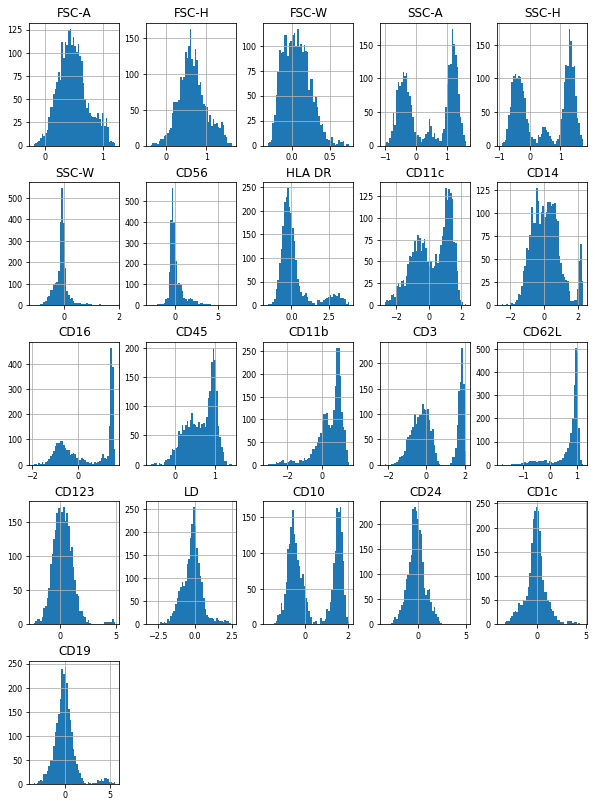

In [12]:
df1.hist(figsize=(10, 14), bins=50, xlabelsize=8, ylabelsize=8); 

In [13]:
corr=df1.corr()
corr

,FSC-A,FSC-H,FSC-W,SSC-A,SSC-H,SSC-W,CD56,HLA DR,CD11c,CD14,...,CD45,CD11b,CD3,CD62L,CD123,LD,CD10,CD24,CD1c,CD19
FSC-A,1.000000,0.977605,0.527390,0.692096,0.686149,0.259487,0.268771,0.099142,0.555076,0.288682,...,-0.568445,0.552842,-0.498270,0.228620,0.093201,0.551340,0.618470,0.022120,-0.100745,-0.137826
FSC-H,0.977605,1.000000,0.336777,0.620321,0.621530,0.144148,0.287947,0.049847,0.512265,0.228022,...,-0.542778,0.490455,-0.450040,0.191819,0.089634,0.514704,0.565344,0.027560,-0.110776,-0.143650
FSC-W,0.527390,0.336777,1.000000,0.592187,0.560699,0.579032,0.040007,0.242325,0.415370,0.371021,...,-0.351998,0.493424,-0.412424,0.248488,0.055115,0.388797,0.484743,-0.012315,-0.003529,-0.036713
SSC-A,0.692096,0.620321,0.592187,1.000000,0.997497,0.292549,0.235506,0.060668,0.800326,0.388546,...,-0.746193,0.734124,-0.734455,0.223279,0.030398,0.614275,0.848489,0.081944,-0.152189,-0.141506
SSC-H,0.686149,0.621530,0.560699,0.997497,1.000000,0.224201,0.236971,0.046233,0.802466,0.379517,...,-0.754154,0.727858,-0.732408,0.222330,0.026107,0.611390,0.852951,0.080672,-0.158999,-0.149136
SSC-W,0.259487,0.144148,0.579032,0.292549,0.224201,1.000000,0.041147,0.210898,0.178099,0.222607,...,-0.085386,0.274662,-0.217679,0.070615,0.065893,0.197941,0.159164,0.038362,0.052698,0.066581
CD56,0.268771,0.287947,0.040007,0.235506,0.236971,0.041147,1.000000,-0.163830,0.215484,0.032062,...,-0.177857,0.262273,-0.247291,-0.226385,-0.081031,0.390254,0.053802,0.152396,-0.119926,-0.178140
HLA DR,0.099142,0.049847,0.242325,0.060668,0.046233,0.210898,-0.163830,1.000000,0.021911,0.542124,...,0.177850,0.207842,-0.251458,-0.066954,0.151067,0.205525,-0.179425,0.050334,0.324469,0.332212
CD11c,0.555076,0.512265,0.415370,0.800326,0.802466,0.178099,0.215484,0.021911,1.000000,0.142645,...,-0.615312,0.552898,-0.615162,0.101596,0.090638,0.496255,0.707958,0.183933,-0.080167,0.044797
CD14,0.288682,0.228022,0.371021,0.388546,0.379517,0.222607,0.032062,0.542124,0.142645,1.000000,...,-0.081780,0.473466,-0.365083,0.101861,0.176385,0.388619,0.150258,0.158188,0.112126,-0.098089


<AxesSubplot:>

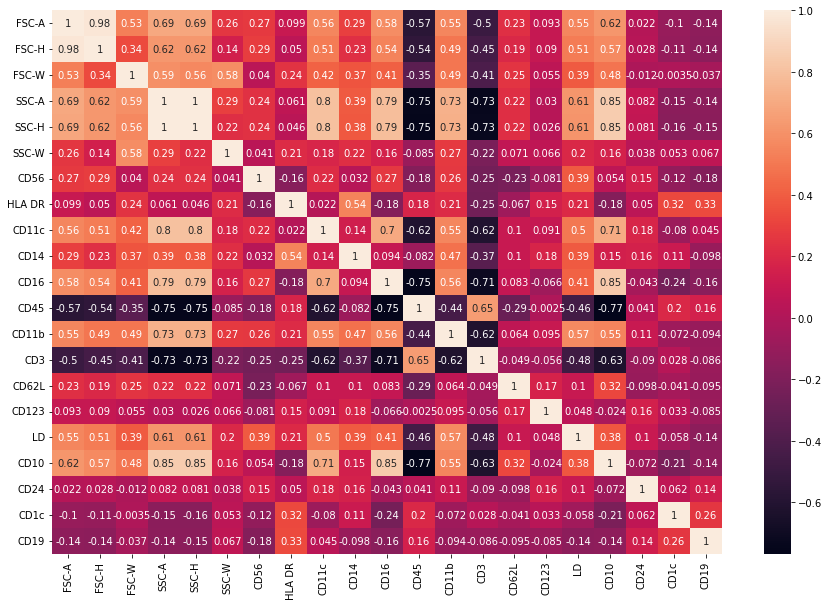

In [16]:
plt.figure(figsize = (15,10))
sns.heatmap(corr,annot=True)

In [17]:
# Features: X
X = pd.read_csv('FlowData.csv', index_col=[0])

# Labels: y
y = X.index # The labels give the cell-type for each cell

X = X.iloc[:, 2:7]

X

,FSC-W,SSC-A,SSC-H,SSC-W,CD56
Neutrophils,0.2162,1.3399,1.4479,-0.0414,-0.2123
T cells,-0.0706,-0.5514,-0.4990,-0.3400,-0.3367
T cells,0.1332,-0.4898,-0.4601,-0.2297,-0.6202
Neutrophils,0.3335,1.3820,1.4708,0.0491,-0.0069
T cells,0.5940,0.4942,0.5065,0.1161,-0.3811
...,...,...,...,...,...
Neutrophils,0.2039,1.2480,1.3538,-0.0578,0.1967
Monocytes,0.2113,0.3559,0.3768,0.0422,-0.6002
Neutrophils,0.1808,1.1389,1.2354,-0.0504,-0.2149
Basophils,-0.1368,-0.4953,-0.4814,-0.1663,-0.8425


In [18]:
# Task 1-multiclass logistic regression(softmax Regression)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
# Data normalisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

scaler.mean_ #show the means for each column

array([ 0.0635006 ,  0.420212  ,  0.47612161, -0.08378591,  0.12408884])

In [20]:
## Cross validation

from sklearn.model_selection import cross_validate
softmax = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs',max_iter=10000)
score=softmax.fit(X_train, y_train)


In [21]:
softmax.intercept_, softmax.coef_ 

(array([-0.64941181, -3.60764691, -1.06376567, -1.20435129,  3.19732721,
         0.63910724,  1.63567508,  1.05306614]),
 array([[-1.42711323, -0.62520267, -0.68931141,  0.70761055, -0.83325718],
        [ 0.43867564, -2.33593438, -2.42431779,  0.58844952, -3.8533507 ],
        [ 1.27695902, -0.27315478, -0.26268395, -0.21629096, -2.50520769],
        [-1.80423831,  3.12143223,  3.24523575, -0.8608741 ,  3.38999224],
        [ 0.89880013,  0.63506855,  0.6386483 ,  0.11864457, -0.90719147],
        [-0.73432244, -1.30000248, -1.37428149,  0.658986  ,  3.14464296],
        [ 0.52668708,  3.97285769,  4.14395512, -1.27713676, -0.19516459],
        [ 0.8245521 , -3.19506417, -3.27724453,  0.28061117,  1.75953643]]))

In [22]:


score = softmax.score(X_test,y_test)
print(score)

0.9236363636363636


In [23]:
#### mean and Sensitvity

scoring = {'acc':'accuracy', 'sens':'recall_macro'}

scores = softmax.score(X_test,y_test)
scores = cross_validate(softmax, X, y, cv=5, scoring = scoring, return_train_score = True)
print(scores)

{'fit_time': array([0.1296978 , 0.13565803, 0.15531373, 0.13866353, 0.13054609]), 'score_time': array([0.00579929, 0.00578499, 0.00580287, 0.005759  , 0.00558805]), 'test_acc': array([0.928, 0.912, 0.922, 0.902, 0.922]), 'train_acc': array([0.9175, 0.9225, 0.9165, 0.9225, 0.918 ]), 'test_sens': array([0.62016435, 0.60670536, 0.6142016 , 0.58566175, 0.59133384]), 'train_sens': array([0.60580706, 0.61312466, 0.6005308 , 0.61100616, 0.60968291])}


In [24]:
y_pred = softmax.predict_proba(X_test)
print(y_pred)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred[:,0], pos_label=0)



[[2.64362701e-07 2.06050687e-10 2.26331658e-06 ... 2.48114341e-05
  9.83397065e-01 1.07958500e-06]
 [8.23997501e-04 5.56390593e-07 9.14679453e-08 ... 7.12613566e-01
  1.44446442e-08 2.86470827e-01]
 [1.47427575e-05 8.16666813e-08 1.67654436e-07 ... 5.95627306e-01
  9.03282255e-09 4.03868229e-01]
 ...
 [2.55066019e-06 1.71784998e-09 2.88881481e-06 ... 3.56355577e-06
  9.82204780e-01 6.40479902e-08]
 [8.13017459e-07 7.41463253e-10 4.75211650e-06 ... 6.62824600e-05
  9.75881857e-01 3.30326713e-06]
 [1.00289509e-03 2.12137927e-06 1.68023177e-06 ... 4.61276442e-01
  1.31292808e-06 5.36909592e-01]]


In [25]:
from sklearn.metrics import accuracy_score
y_pred = softmax.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)


[[  0   0   0   0   0   0   0   8]
 [  0  16   0   0   0   0   0   8]
 [  0   1   0   0   2   0   0   0]
 [  0   0   0  36   0   0   6   0]
 [  0   0   0   1  54   1   2   2]
 [  0   0   0   0   0  30   0  16]
 [  0   0   0   1   2   0 359   0]
 [  0   0   0   0   4   9   0 267]]


In [26]:
## Sensitivity

sensitivity = make_scorer(recall_score, pos_label=1, average='macro')
scores = cross_val_score(softmax, X, y, cv=5, scoring=sensitivity)
scores

array([0.62016435, 0.60670536, 0.6142016 , 0.58566175, 0.59133384])

In [27]:
# mean accuracy, sensitivity and specificity for each class

from sklearn.metrics import classification_report
y_pred = softmax.predict(X_test)
print(classification_report(y_test, y_pred))

y_test.value_counts()

              precision    recall  f1-score   support

     B cells       0.00      0.00      0.00         8
   Basophils       0.94      0.67      0.78        24
    DC cells       0.00      0.00      0.00         3
 Eosinophils       0.95      0.86      0.90        42
   Monocytes       0.87      0.90      0.89        60
    NK cells       0.75      0.65      0.70        46
 Neutrophils       0.98      0.99      0.98       362
     T cells       0.89      0.95      0.92       280

    accuracy                           0.92       825
   macro avg       0.67      0.63      0.65       825
weighted avg       0.91      0.92      0.92       825



Neutrophils    362
T cells        280
Monocytes       60
NK cells        46
Eosinophils     42
Basophils       24
B cells          8
DC cells         3
dtype: int64

In [28]:
# Task 3-Perceptron


clfp = Perceptron(tol=1e-3, random_state=0)
clfp.fit(X, y)
clfp.score(X, y)
clfp 


Perceptron()

In [29]:
score = clfp.score(X_test,y_test)
print(score)

0.7090909090909091


In [30]:
predsP=clfp.predict(X)
predsP

array(['Neutrophils', 'T cells', 'T cells', ..., 'Neutrophils', 'T cells',
       'Monocytes'], dtype='<U11')

In [31]:
scores = clfp.score(X_test,y_test)
scores = cross_validate(clfp, X, y, scoring = scoring, return_train_score = True)
print(scores)

{'fit_time': array([0.0183413 , 0.01510239, 0.01477194, 0.01459122, 0.01454878]), 'score_time': array([0.00617981, 0.00533295, 0.00524116, 0.00526118, 0.00503397]), 'test_acc': array([0.862, 0.802, 0.87 , 0.83 , 0.866]), 'train_acc': array([0.8485, 0.826 , 0.87  , 0.8445, 0.8595]), 'test_sens': array([0.57902611, 0.5302391 , 0.46943494, 0.54575546, 0.50468122]), 'train_sens': array([0.5767926 , 0.55647599, 0.46716819, 0.55399674, 0.52934729])}


In [32]:
# mean accuracy, sensitivity and specificity for each class

y_pred = clfp.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     B cells       0.00      0.00      0.00         8
   Basophils       0.60      0.12      0.21        24
    DC cells       0.00      0.00      0.00         3
 Eosinophils       0.55      0.74      0.63        42
   Monocytes       0.41      0.75      0.53        60
    NK cells       0.29      0.87      0.44        46
 Neutrophils       0.97      0.80      0.87       362
     T cells       0.87      0.64      0.73       280

    accuracy                           0.71       825
   macro avg       0.46      0.49      0.43       825
weighted avg       0.81      0.71      0.73       825



In [33]:
# TASK 4-random forest

clfR = RandomForestClassifier()
clfR.fit(X_train, y_train)
clfR.score(X_test, y_test)

0.9321212121212121

In [34]:
#predictions
predsR=clfR.predict(X)
predsR

array(['Neutrophils', 'T cells', 'Monocytes', ..., 'Neutrophils',
       'Monocytes', 'Monocytes'], dtype=object)

In [35]:
scores = clfR.score(X_test,y_test)
scores = cross_validate(clfR, X, y, scoring = scoring, return_train_score = True)
print(scores)

{'fit_time': array([0.41110849, 0.3946228 , 0.47089052, 0.42640519, 0.40442705]), 'score_time': array([0.02803659, 0.02801323, 0.02802658, 0.0279789 , 0.02860641]), 'test_acc': array([0.928, 0.924, 0.934, 0.926, 0.936]), 'train_acc': array([1.    , 1.    , 0.9995, 1.    , 1.    ]), 'test_sens': array([0.66560808, 0.67754591, 0.68054891, 0.68855857, 0.65895978]), 'train_sens': array([1.     , 1.     , 0.99375, 1.     , 1.     ])}


In [36]:
# mean accuracy, sensitivity and specificity for each class

y_pred = clfR.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     B cells       0.00      0.00      0.00         8
   Basophils       0.95      0.88      0.91        24
    DC cells       1.00      0.33      0.50         3
 Eosinophils       0.95      0.95      0.95        42
   Monocytes       0.84      0.90      0.87        60
    NK cells       0.74      0.74      0.74        46
 Neutrophils       0.99      0.99      0.99       362
     T cells       0.91      0.94      0.92       280

    accuracy                           0.93       825
   macro avg       0.80      0.72      0.74       825
weighted avg       0.93      0.93      0.93       825

